competition https://www.kaggle.com/competitions/playground-series-s4e10

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# desision tree
from sklearn.tree import DecisionTreeClassifier
# 1-rule classifier
from sklearn.dummy import DummyClassifier
#  naive bayes
from sklearn.naive_bayes import GaussianNB
# knn
from sklearn.neighbors import KNeighborsClassifier

# Load dataset

In [ ]:
data = pd.read_csv('data/train.csv')

print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [ ]:

print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64


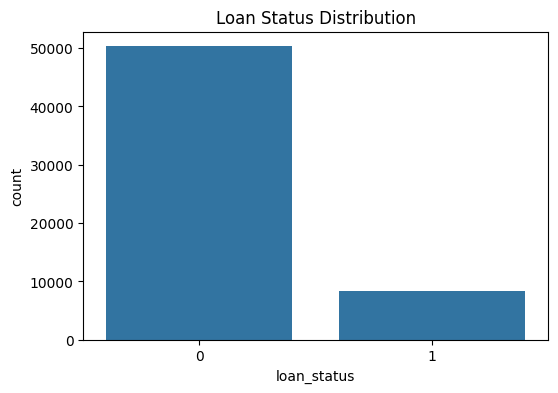

In [ ]:

plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=data)
plt.title('Loan Status Distribution')
plt.show()

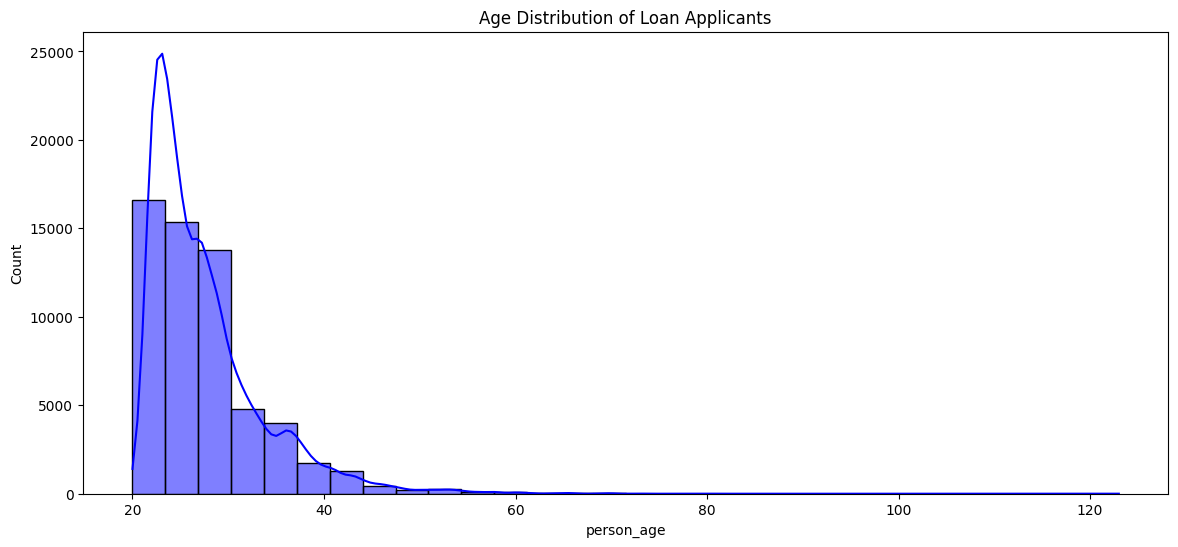

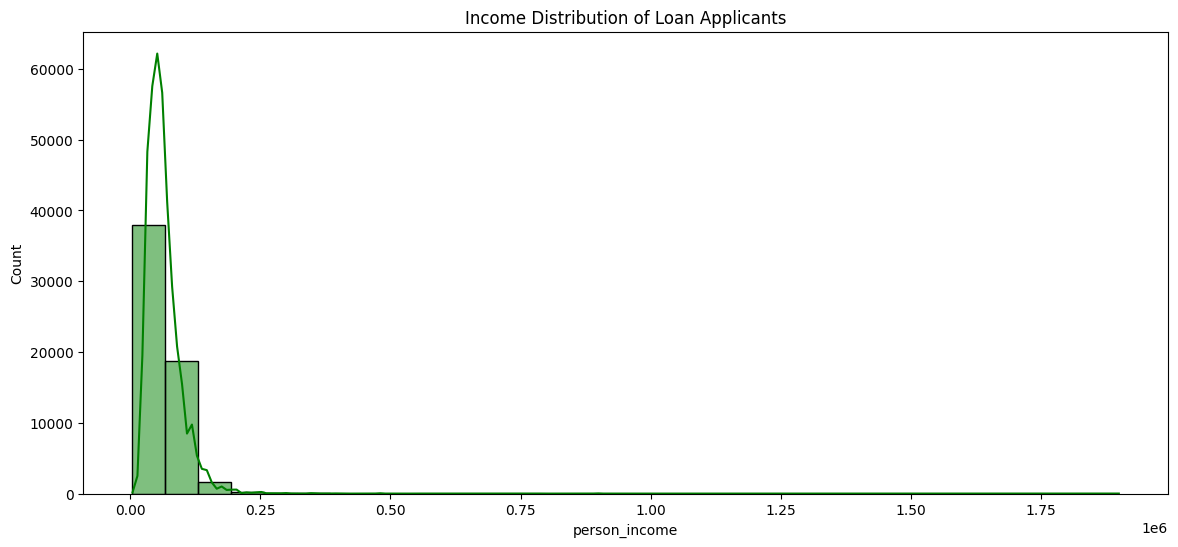

In [6]:
# Visualizing feature distributions
plt.figure(figsize=(14, 6))
sns.histplot(data['person_age'], kde=True, bins=30, color='blue', label='Person Age')
plt.title('Age Distribution of Loan Applicants')
plt.show()

plt.figure(figsize=(14, 6))
sns.histplot(data['person_income'], kde=True, bins=30, color='green', label='Person Income')
plt.title('Income Distribution of Loan Applicants')
plt.show()

In [ ]:
data = data.dropna()  

# Encode categorical

In [ ]:

label_encoder = LabelEncoder()
data['cb_person_default_on_file'] = label_encoder.fit_transform(data['cb_person_default_on_file'])

In [ ]:

data = pd.get_dummies(data, columns=['person_home_ownership', 'loan_intent', 'loan_grade'], drop_first=True)

scaler = StandardScaler()
numeric_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [ ]:

X = data.drop(['loan_status', 'id'], axis=1) 
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (46916, 22), y_train shape: (46916,)
X_test shape: (11729, 22), y_test shape: (11729,)


# Model Training

In [23]:
# Model Training and Ensemble
# Initialize a list to store individual models
models = []

# 1-rule classifier
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train, y_train)
models.append(('1-rule classifier', dummy_model))

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
models.append(('Naive Bayes', nb_model))

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
models.append(('Decision Tree', dt_model))

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
models.append(('K-Nearest Neighbors', knn_model))

In [ ]:
# evaluate the models
results = []
for name, model in models:
    # train
    y_pred = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred)
    roc_auc_train = roc_auc_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    results.append([name, accuracy_train, roc_auc_train, accuracy, roc_auc])

In [29]:
# Display the results
results_df = pd.DataFrame(results, columns=['Model', 'Train Accuracy', 'Train ROC AUC', 'Test Accuracy', 'Test ROC AUC'])
results_df

,Model,Train Accuracy,Train ROC AUC,Test Accuracy,Test ROC AUC
0,1-rule classifier,0.857021,0.500000,0.860005,0.500000
1,Naive Bayes,0.890805,0.734895,0.892318,0.734209
2,Decision Tree,1.000000,1.000000,0.909967,0.829874
3,K-Nearest Neighbors,0.944923,0.842544,0.933072,0.821128


In [30]:
# reports for each model
for name, model in models:
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))

Classification Report for 1-rule classifier:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     10087
           1       0.00      0.00      0.00      1642

    accuracy                           0.86     11729
   macro avg       0.43      0.50      0.46     11729
weighted avg       0.74      0.86      0.80     11729

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     10087
           1       0.64      0.51      0.57      1642

    accuracy                           0.89     11729
   macro avg       0.78      0.73      0.76     11729
weighted avg       0.88      0.89      0.89     11729

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10087
           1       0.67      0.72      0.69      1642

    accuracy                           0.91     11729
   

/home/qwas/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/qwas/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/qwas/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     10087
           1       0.82      0.67      0.74      1642

    accuracy                           0.93     11729
   macro avg       0.88      0.82      0.85     11729
weighted avg       0.93      0.93      0.93     11729



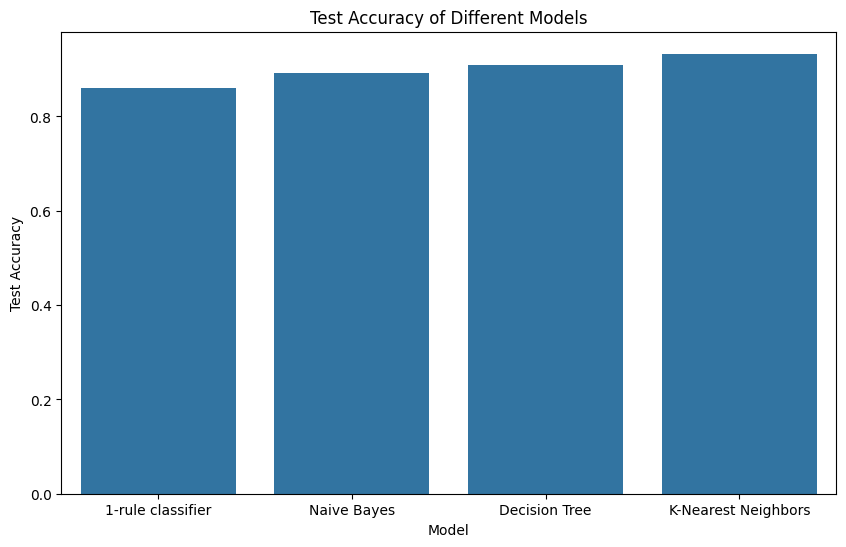

In [31]:
# Visualizing the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Accuracy', data=results_df)
plt.title('Test Accuracy of Different Models')
plt.show()


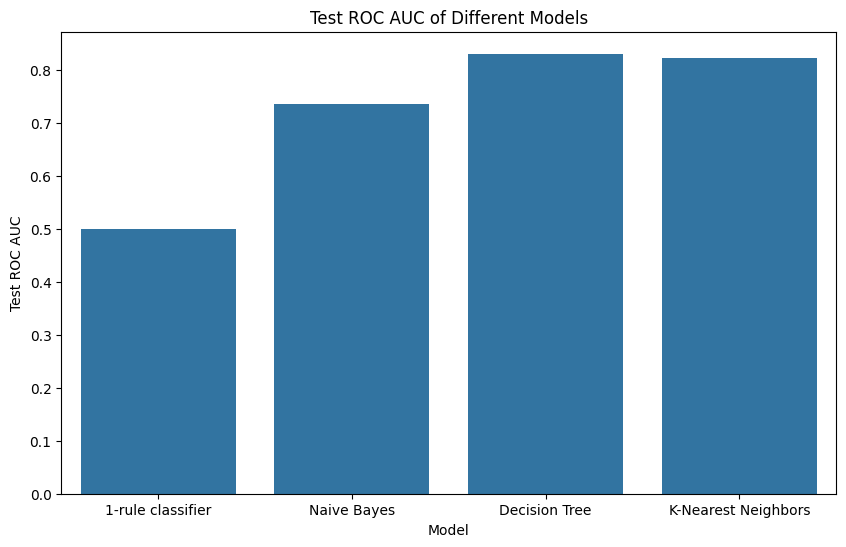

In [32]:
# Visualizing the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test ROC AUC', data=results_df)
plt.title('Test ROC AUC of Different Models')
plt.show()

# Model Performance Analysis Conclusion

Based on the classification reports and performance metrics provided, here is a concise conclusion about the model usage:

## Performance Ranking (Best to Worst)

1. **K-Nearest Neighbors (KNN)**: Best overall performance with 93.3% test accuracy and the highest ability to identify positive cases (class 1) with good precision (0.82) and reasonable recall (0.67).

2. **Decision Tree**: Good performance with 91% test accuracy, but shows signs of overfitting (100% train accuracy vs. 91% test accuracy).

3. **Naive Bayes**: Solid baseline performance (89.2% test accuracy) with balanced precision and recall.

4. **1-Rule Classifier**: Poorest performance (86% accuracy) that simply predicts the majority class (0) in all cases, making it ineffective for identifying the minority class.

## Key Insights

- The dataset is **imbalanced** (10,087 class 0 vs. 1,642 class 1 samples), which explains why accuracy alone is not sufficient for evaluation.

- **KNN** achieves the best balance between precision and recall for the minority class, making it the most suitable model if detecting class 1 instances is important.

- All models perform reasonably well on the majority class (class 0), but differ significantly in their ability to identify the minority class (class 1).

- The **Decision Tree** shows clear signs of overfitting to the training data, suggesting that pruning or regularization might improve its generalization.

If the goal is to identify minority class instances effectively, KNN is the recommended model from this comparison.